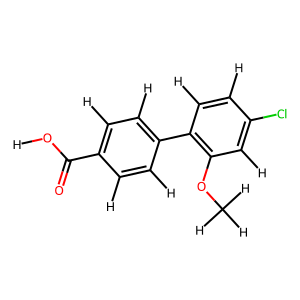

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

# Example SMILES (Diclofenac)
smiles = "COC1=C(C=CC(=C1)Cl)C2=CC=C(C=C2)C(=O)O"
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)  # Optional: add hydrogens for realism

# Draw basic molecule
drawer = rdMolDraw2D.MolDraw2DSVG(300, 300)
drawer.DrawMolecule(mol)
drawer.FinishDrawing()
SVG(drawer.GetDrawingText())


In [2]:
from rdkit import Chem

def feature_atoms(mol, features):
    """
    Given an RDKit Mol and a list of feature names,
    return {atom_idx: colour} for RDKit highlighting.
    """
    colours = {
        "acidic_group":        (1.0, 0.2, 0.2),   # red
        "arylacetic_core":     (1.0, 0.5, 0.0),   # orange
        "glucocorticoid_core": (0.5, 0.5, 1.0),   # light blue
        "aromatic_amine":      (0.2, 0.8, 0.2),   # green
        "trifluoromethyl":     (0.8, 0.0, 0.8)    # purple
    }
    highlight_atoms = {}
    for feat in features:
        smarts = SMARTS_PATTERNS.get(feat)
        if smarts is None:
            continue
        patt = Chem.MolFromSmarts(smarts)
        for match in mol.GetSubstructMatches(patt):
            for idx in match:
                highlight_atoms[idx] = colours.get(feat, (0.9,0.9,0.0))  # default yellow
    return highlight_atoms


In [4]:
# ── feature name → SMARTS pattern ──
SMARTS_PATTERNS = {
    "acidic_group":        "[CX3](=O)[OX1H0-,OX2H1]",          # generic carboxylic / acidic
    "arylacetic_core":     "c[C;X3](=O)[OX1H0-,OX2H1]",        # aryl–CH2–COOH core
    "glucocorticoid_core": "C1CCC2C1(CCC3C2CCC4C3(CCC(O4)=O)=O)",  # steroid core (simplified)
    "aromatic_amine":      "[NH2;!H0][c|n]",                   # primary aromatic amine
    "trifluoromethyl":     "C(F)(F)F"
}


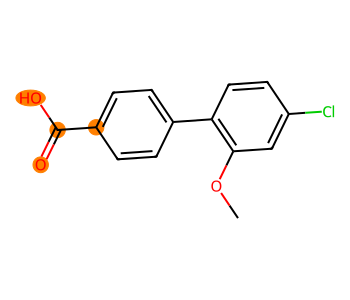

In [5]:
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

smiles = "COC1=C(C=CC(=C1)Cl)C2=CC=C(C=C2)C(=O)O"  # Diclofenac
mol = Chem.MolFromSmiles(smiles)

features_to_show = ["acidic_group", "arylacetic_core"]
atom_colours = feature_atoms(mol, features_to_show)

drawer = rdMolDraw2D.MolDraw2DSVG(350, 300)
rdMolDraw2D.PrepareAndDrawMolecule(
    drawer, mol,
    highlightAtoms=list(atom_colours.keys()),
    highlightAtomColors=atom_colours
)
drawer.FinishDrawing()
SVG(drawer.GetDrawingText())
